Multiple Linear Regression - Xây dựng và đánh giá

In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [53]:
df= pd.read_csv('location_rev.csv')

In [54]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [55]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


In [56]:
# Chuẩn bị dữ liệu để training data/ test data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df[['median_income','population_density','location_age','num_competitors','num_loyalty_members']]
y = df['revenue']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression


In [61]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
print(model.intercept_)
print(model.coef_)

-51812.60099411944
[ 1.75664026e+00  4.19605202e+00  2.05476936e+03 -2.07278264e+03
  3.44931957e+00]


In [64]:
# Đánh giá model

In [65]:
# R^2 cho toàn dữ liệu
model.score(X,y)

0.8132461509625999

In [66]:
# R^2 khi train
model.score(X_train,y_train)

0.8151586089690087

In [67]:
# R^2 khi test
model.score(X_test,y_test)

0.807118503576423

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

25977436.48928608


In [70]:
mae = mean_absolute_error(y_pred,y_test)
print(mae)

4211.766053217508


Đặt giới hạn trục x và y là 10.000 để chúng ta có được cái nhìn rõ hơn về vị trí của hầu hết các điểm dữ liệu.
Thêm line có độ dốc 1 đóng vai trò là tham chiếu. Nếu tất cả các điểm nằm trên line này, điều đó có nghĩa là có một mối quan hệ hoàn hảo giữa thực tế và dự đoán.

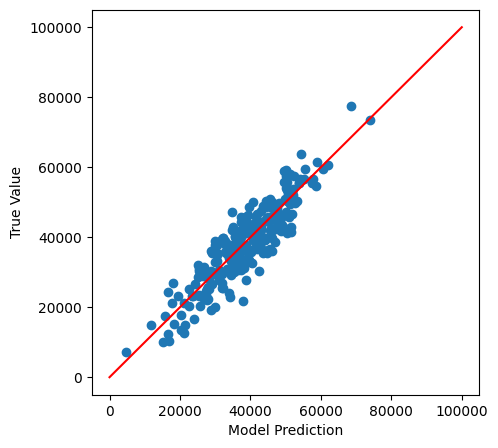

In [71]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Prediction')
plt.ylabel('True Value')
plt.plot([0,100000],[0,100000],'-',color = 'r')
plt.show()

In [72]:
# Cho x dự đoán y

In [73]:
X_new = pd.DataFrame({
    'median_income':[3000]
    ,'population_density':[50]
    ,'location_age':[30]
    ,'num_competitors':[5]
    ,'num_loyalty_members':[3]
})

In [74]:
Y_new = model.predict(X_new)
print(Y_new)

[4956.6379395]


C:\Users\NK\AppData\Local\Temp\ipykernel_13840\3788479721.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color = "r", label=" Actual Train Values")
C:\Users\NK\AppData\Local\Temp\ipykernel_13840\3788479721.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

<function matplotlib.pyplot.show(close=None, block=None)>

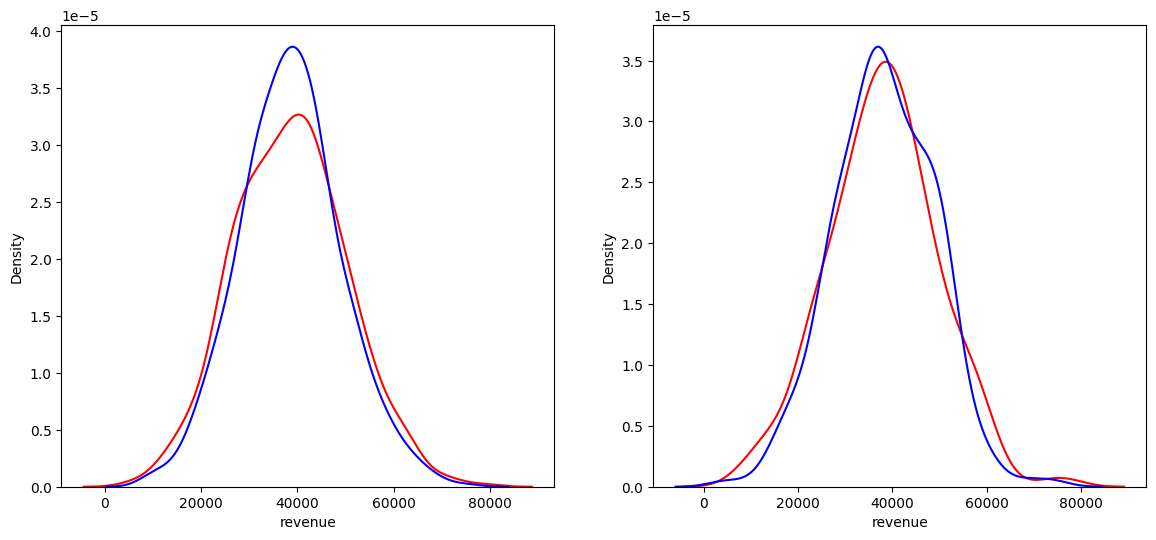

In [75]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color = "r", label=" Actual Train Values")
sns.distplot(model.predict(X_train), hist=False, color= "b", label="Predicted Train Values",ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Test Values")
sns.distplot(model.predict(X_test), hist=False, color="b", label="Predicted Test Values" , ax=ax2)
plt.show

Lựa chọn thuộc tính

Sử dụng Selection K Best

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [77]:
# Apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [79]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# Sorting in descending order 
featureScores.sort_values("Score", ascending = False, inplace = True)
print(featureScores)

                 Specs       Score
0        median_income  566.922357
2         location_age  439.125397
1   population_density  107.360798
4  num_loyalty_members   30.949544
3      num_competitors   25.117590


Sử dụng Heatmap

In [80]:
# Correlation Matrix with Heatmap


In [81]:
top_corr_features = df.corr().index
top_corr_features

Index(['revenue', 'num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [82]:
import matplotlib
matplotlib.__version__

'3.6.3'

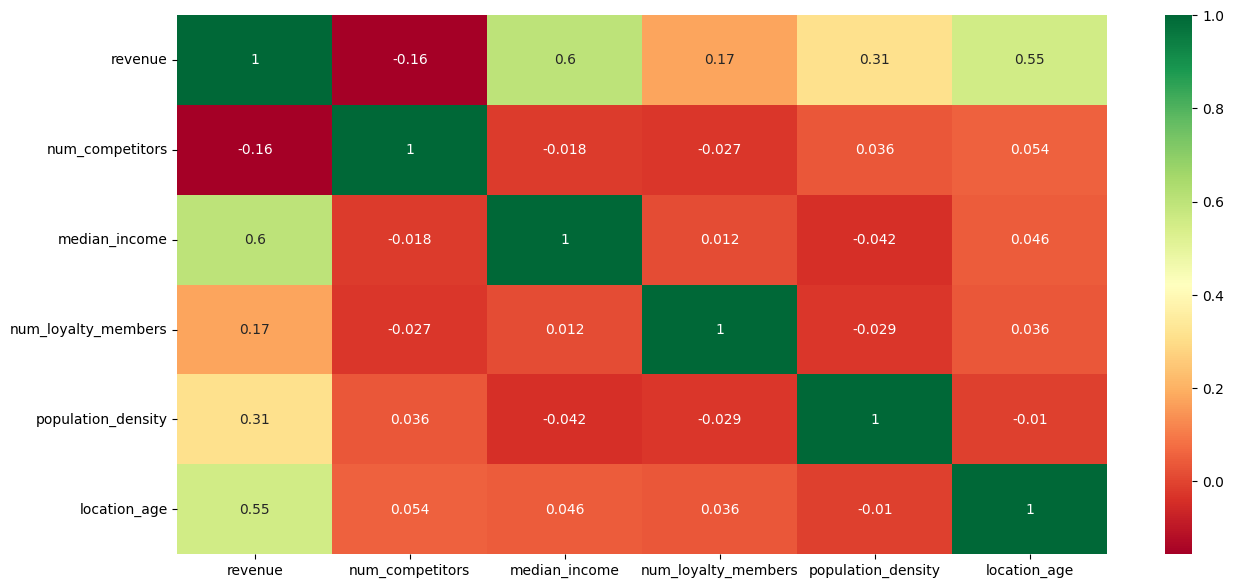

In [83]:
plt.figure(figsize=(15,7))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn", annot=True) # annot=True: nếu muốn in cả giá trị
plt.show()

Sau khi lựa chọn thuộc tính => áp dụng lại thuật toán

In [84]:
# 3 thuộc tính có score cao nhất
X2 = df[['median_income', 'population_density', 'location_age']]
y2 = df['revenue']

In [85]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 100)

In [86]:
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression()

In [87]:
model2.score(X2, y2)

0.7552028859956076

In [88]:
model2.score(X2_train, y2_train)

0.7526411491478369

In [89]:
model2.score(X2_test, y2_test)

0.7632552854044201

In [90]:
mean_squared_error(model2.predict(X2_test), y2_test)

30672514.389709026

In [91]:
mean_absolute_error(model2.predict(X2_test), y2_test)

4358.312766077768